In [142]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

In [143]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [144]:
df1 = pd.read_csv("/content/drive/MyDrive/Datasets/colombo_t_2012-2018.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Datasets/colombo_rh_2012-2018.csv")

In [145]:
df1.head()

,station_id,station_name,element_name,year,month,day,obs_val
0,43466,COLOMBO,TMPMAX,2012,1,1,30.1
1,43466,COLOMBO,TMPMAX,2012,1,2,30.7
2,43466,COLOMBO,TMPMAX,2012,1,3,31.6
3,43466,COLOMBO,TMPMAX,2012,1,4,30.4
4,43466,COLOMBO,TMPMAX,2012,1,5,32.3


In [146]:
df1['date'] = pd.to_datetime(df1[['day','month','year']], format='%d-%m-%Y', errors='coerce')

In [147]:
df1.head()

,station_id,station_name,element_name,year,month,day,obs_val,date
0,43466,COLOMBO,TMPMAX,2012,1,1,30.1,2012-01-01
1,43466,COLOMBO,TMPMAX,2012,1,2,30.7,2012-01-02
2,43466,COLOMBO,TMPMAX,2012,1,3,31.6,2012-01-03
3,43466,COLOMBO,TMPMAX,2012,1,4,30.4,2012-01-04
4,43466,COLOMBO,TMPMAX,2012,1,5,32.3,2012-01-05


In [148]:
df1.drop(columns=['station_id', 'station_name','year','month','day'], inplace=True)
df1.shape

(3673, 3)

In [149]:
df1['element_name'].value_counts()

element_name
TMPMAX    2577
TMPMIN    1096
Name: count, dtype: int64

In [150]:
df1.drop_duplicates(subset=['date'], inplace=True)
df1.shape

(2558, 3)

In [151]:
df1.head()

,element_name,obs_val,date
0,TMPMAX,30.1,2012-01-01
1,TMPMAX,30.7,2012-01-02
2,TMPMAX,31.6,2012-01-03
3,TMPMAX,30.4,2012-01-04
4,TMPMAX,32.3,2012-01-05


In [152]:
df1['element_name'].value_counts()

element_name
TMPMAX    2558
Name: count, dtype: int64

In [153]:
df1.dropna(inplace=True)

In [154]:
df1.shape

(2554, 3)

In [155]:
df2.head()

,station_id,station_name,element_name,year,month,day,obs_val
0,43466,COLOMBO,RHMAX,2012,1,1,91.0
1,43466,COLOMBO,RHMAX,2012,1,2,90.0
2,43466,COLOMBO,RHMAX,2012,1,3,89.0
3,43466,COLOMBO,RHMAX,2012,1,4,89.0
4,43466,COLOMBO,RHMAX,2012,1,5,95.0


In [156]:
df2['date'] = pd.to_datetime(df2[['day','month','year']], format='%d-%m-%Y', errors='coerce')

In [157]:
df2.head()

,station_id,station_name,element_name,year,month,day,obs_val,date
0,43466,COLOMBO,RHMAX,2012,1,1,91.0,2012-01-01
1,43466,COLOMBO,RHMAX,2012,1,2,90.0,2012-01-02
2,43466,COLOMBO,RHMAX,2012,1,3,89.0,2012-01-03
3,43466,COLOMBO,RHMAX,2012,1,4,89.0,2012-01-04
4,43466,COLOMBO,RHMAX,2012,1,5,95.0,2012-01-05


In [158]:
df2['element_name'].value_counts()

element_name
RHMAX    2942
RHMIN    1461
Name: count, dtype: int64

In [159]:
df2.drop(columns=['station_id', 'station_name','year','month','day'], inplace=True)
df2.shape

(4403, 3)

In [160]:
df2.drop_duplicates(subset=['date'], inplace=True)
df2.shape

(2558, 3)

In [161]:
df2.dropna(inplace=True)
df2.shape

(2557, 3)

In [162]:
df2['element_name'].value_counts()

element_name
RHMAX    2557
Name: count, dtype: int64

In [163]:
df_hi = pd.merge(df1, df2, on=['date'], how='outer')
df_hi

,element_name_x,obs_val_x,date,element_name_y,obs_val_y
0,TMPMAX,30.1,2012-01-01,RHMAX,91.0
1,TMPMAX,30.7,2012-01-02,RHMAX,90.0
2,TMPMAX,31.6,2012-01-03,RHMAX,89.0
3,TMPMAX,30.4,2012-01-04,RHMAX,89.0
4,TMPMAX,32.3,2012-01-05,RHMAX,95.0
...,...,...,...,...,...
2552,TMPMAX,32.8,2018-12-30,RHMAX,81.0
2553,TMPMAX,31.4,2018-12-31,RHMAX,82.0
2554,NaN,NaN,2015-02-01,RHMAX,82.0
2555,NaN,NaN,2015-02-02,RHMAX,82.0


In [164]:
df_hi.dropna(inplace=True)
df_hi

,element_name_x,obs_val_x,date,element_name_y,obs_val_y
0,TMPMAX,30.1,2012-01-01,RHMAX,91.0
1,TMPMAX,30.7,2012-01-02,RHMAX,90.0
2,TMPMAX,31.6,2012-01-03,RHMAX,89.0
3,TMPMAX,30.4,2012-01-04,RHMAX,89.0
4,TMPMAX,32.3,2012-01-05,RHMAX,95.0
...,...,...,...,...,...
2549,TMPMAX,31.4,2018-12-27,RHMAX,90.0
2550,TMPMAX,30.2,2018-12-28,RHMAX,88.0
2551,TMPMAX,31.4,2018-12-29,RHMAX,76.0
2552,TMPMAX,32.8,2018-12-30,RHMAX,81.0


In [165]:
df_hi_new = df_hi.drop(columns=['element_name_x', 'element_name_y'])
df_hi_new

,obs_val_x,date,obs_val_y
0,30.1,2012-01-01,91.0
1,30.7,2012-01-02,90.0
2,31.6,2012-01-03,89.0
3,30.4,2012-01-04,89.0
4,32.3,2012-01-05,95.0
...,...,...,...
2549,31.4,2018-12-27,90.0
2550,30.2,2018-12-28,88.0
2551,31.4,2018-12-29,76.0
2552,32.8,2018-12-30,81.0


In [166]:
df_hi_new = df_hi_new.rename(columns={'obs_val_x': 'temp_val', 'obs_val_y': 'rh_val'})
df_hi_new

,temp_val,date,rh_val
0,30.1,2012-01-01,91.0
1,30.7,2012-01-02,90.0
2,31.6,2012-01-03,89.0
3,30.4,2012-01-04,89.0
4,32.3,2012-01-05,95.0
...,...,...,...
2549,31.4,2018-12-27,90.0
2550,30.2,2018-12-28,88.0
2551,31.4,2018-12-29,76.0
2552,32.8,2018-12-30,81.0


In [167]:
def calculate_heat_index(temp, rh):
    hi = (-42.379 +
          2.04901523 * temp +
          10.14333127 * rh -
          0.22475541 * temp * rh -
          0.00683783 * temp ** 2 -
          0.05481717 * rh ** 2 +
          0.00122874 * temp ** 2 * rh +
          0.00085282 * temp * rh ** 2 -
          0.00000199 * temp ** 2 * rh ** 2)
    return hi

# Apply the function to create the 'hi_val' column
df_hi_new['hi_val'] = calculate_heat_index(df_hi_new['temp_val'], df_hi_new['rh_val'])


In [168]:
df_hi_new

,temp_val,date,rh_val,hi_val
0,30.1,2012-01-01,91.0,165.523631
1,30.7,2012-01-02,90.0,163.068238
2,31.6,2012-01-03,89.0,158.913671
3,30.4,2012-01-04,89.0,165.897768
4,32.3,2012-01-05,95.0,147.549641
...,...,...,...,...
2549,31.4,2018-12-27,90.0,158.987714
2550,30.2,2018-12-28,88.0,168.074921
2551,31.4,2018-12-29,76.0,168.544301
2552,32.8,2018-12-30,81.0,158.853594


In [169]:
df = df_hi_new.drop(columns=['temp_val', 'rh_val'])

In [170]:
df.head()

,date,hi_val
0,2012-01-01,165.523631
1,2012-01-02,163.068238
2,2012-01-03,158.913671
3,2012-01-04,165.897768
4,2012-01-05,147.549641


In [171]:
df.set_index('date', inplace=True)
df.head()

,hi_val
date,
2012-01-01,165.523631
2012-01-02,163.068238
2012-01-03,158.913671
2012-01-04,165.897768
2012-01-05,147.549641


In [172]:
ts = df['hi_val'].resample('M').mean()

In [173]:
ts.head()

date
2012-01-31    165.901427
2012-02-29    159.839034
2012-03-31    160.537744
2012-04-30    157.681159
2012-05-31    164.112311
Freq: M, Name: hi_val, dtype: float64

<Axes: xlabel='date'>

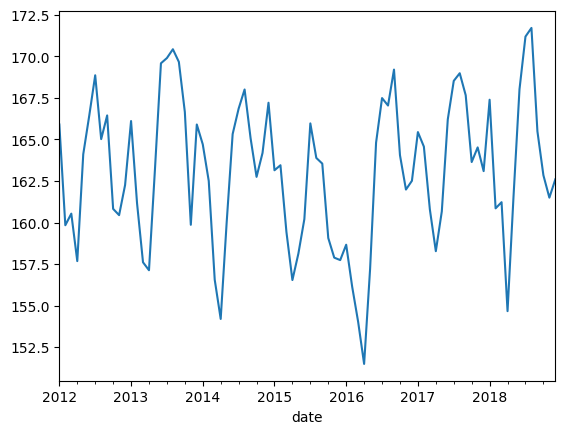

In [174]:
ts.plot()

### **Stationarity check**

In [175]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

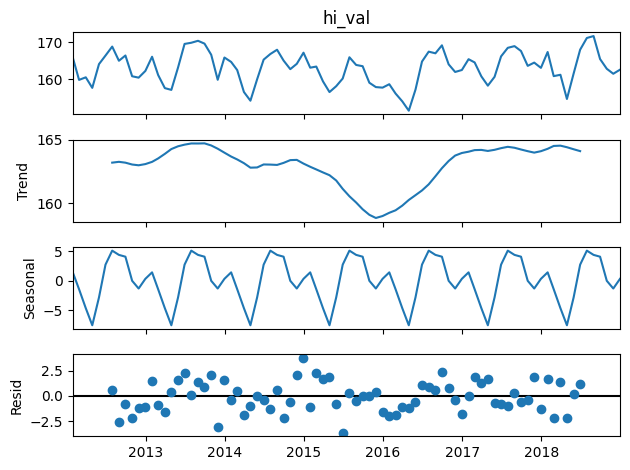

In [176]:
decomposition = sm.tsa.seasonal_decompose(ts, model='additive')
fig = decomposition.plot()
plt.show()

In [177]:
from statsmodels.tsa.stattools import adfuller

In [178]:
adftest = adfuller(ts)

In [179]:
print('pvalue of adfuller test: ', adftest[1])

pvalue of adfuller test:  0.34075061365506054


### **Train Test Split**

In [180]:
len(ts)

84

In [181]:
train = ts[:64]
test = ts[64:]

### **ARIMA Model Building**

In [182]:
import itertools
import numpy as np
from sklearn.metrics import mean_squared_error

In [183]:
p = range(0,8)
q = range(0,8)
d = range(0,2)

In [184]:
pdq_combination = list(itertools.product(p,d,q))

In [185]:
pdq_combination

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 0, 6),
 (1, 0, 7),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 1, 7),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 0, 5),
 (2, 0, 6),
 (2, 0, 7),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 1, 5),
 (2, 1, 6),
 (2, 1, 7),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 0, 5),
 (3, 0, 6),
 (3, 0, 7),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 1, 5),
 (3, 1, 6),
 (3, 1, 7),
 (4, 0, 0),
 (4, 0, 1),
 (4, 0, 2),
 (4, 0, 3),
 (4, 0, 4),
 (4, 0, 5),
 (4, 0, 6),
 (4, 0, 7),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4),
 (4, 1, 5),
 (4, 1, 6),
 (4, 1, 7),
 (5, 0, 0),
 (5, 0, 1),
 (5, 0, 2),
 (5,

In [186]:
len(pdq_combination)

128

In [187]:
rmse = []
order1 = []

In [188]:
for pdq in pdq_combination:
    try:
        # Fit an ARIMA model with the current combination of p, d, q
        model = ARIMA(train, order=pdq).fit()

        # Make predictions for the test set
        pred = model.predict(start=len(train), end=(len(ts) - 1))

        # Calculate the RMSE
        error = np.sqrt(mean_squared_error(test, pred))

        # Append the RMSE and corresponding order (p, d, q) to lists
        order1.append(pdq)
        rmse.append(error)

    except:
        continue

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:60

In [189]:
results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

In [190]:
results.to_csv('ARIMA_result.csv')

In [191]:
model = ARIMA(train, order=(7,1,7)).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### **Predict Test Data**

In [192]:
import warnings
warnings.filterwarnings('ignore')

In [194]:
len(train),(len(ts)-1)

(64, 83)

In [195]:
pred = model.predict(start=len(train),end=(len(ts)-1))

In [197]:
pred.head()

2017-05-31    159.300860
2017-06-30    163.183447
2017-07-31    165.988389
2017-08-31    166.610552
2017-09-30    164.801405
Freq: M, Name: predicted_mean, dtype: float64

### **Model Evaluation**

In [196]:
error = np.sqrt(mean_squared_error(test,pred))
error

3.1834531519291396

In [198]:
test.mean(), np.sqrt(test.var())

(164.6198671842083, 4.164159444725919)

<Axes: xlabel='date'>

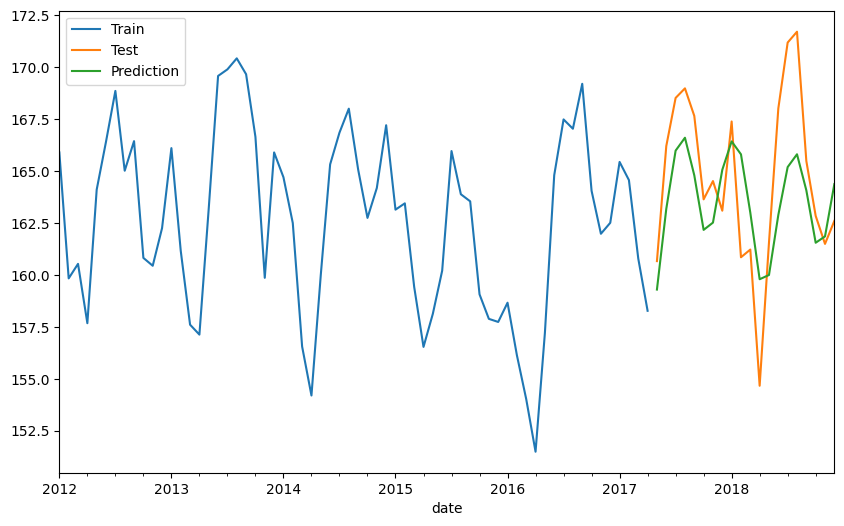

In [199]:
train.plot(legend=True, label='Train', figsize=(10,6))
test.plot(legend=True, label='Test')
pred.plot(legend=True, label='Prediction')

### **Next 12 Months HI Forecast**

In [201]:
final_model = ARIMA(ts,order=(7,1,7)).fit()

In [202]:
prediction=final_model.predict(len(ts), len(ts)+12)

In [206]:
prediction

2019-01-31    161.773150
2019-02-28    159.773556
2019-03-31    157.208129
2019-04-30    157.031522
2019-05-31    160.990484
2019-06-30    166.369110
2019-07-31    168.652395
2019-08-31    167.505454
2019-09-30    163.952790
2019-10-31    160.806784
2019-11-30    160.936772
2019-12-31    162.661952
2020-01-31    162.627140
Freq: M, Name: predicted_mean, dtype: float64

In [208]:
print(type(prediction))

<class 'pandas.core.series.Series'>


In [209]:
prediction_df = prediction.to_frame()

In [218]:
prediction_df

,Predicted_HI
2019-01-31,161.773150
2019-02-28,159.773556
2019-03-31,157.208129
2019-04-30,157.031522
2019-05-31,160.990484
2019-06-30,166.369110
2019-07-31,168.652395
2019-08-31,167.505454
2019-09-30,163.952790
2019-10-31,160.806784


In [219]:
# Reset the index to convert the date index to a regular column
prediction_df.reset_index(inplace=True)

# Rename the index column to 'month'
prediction_df.rename(columns={'index': 'month', 'predicted_mean': 'Predicted_HI'}, inplace=True)

In [220]:
prediction_df

,month,Predicted_HI
0,2019-01-31,161.773150
1,2019-02-28,159.773556
2,2019-03-31,157.208129
3,2019-04-30,157.031522
4,2019-05-31,160.990484
5,2019-06-30,166.369110
6,2019-07-31,168.652395
7,2019-08-31,167.505454
8,2019-09-30,163.952790
9,2019-10-31,160.806784


In [224]:
prediction_df.to_csv('HI_Forecast.csv', index=True, date_format='%Y-%m')

<Axes: xlabel='date'>

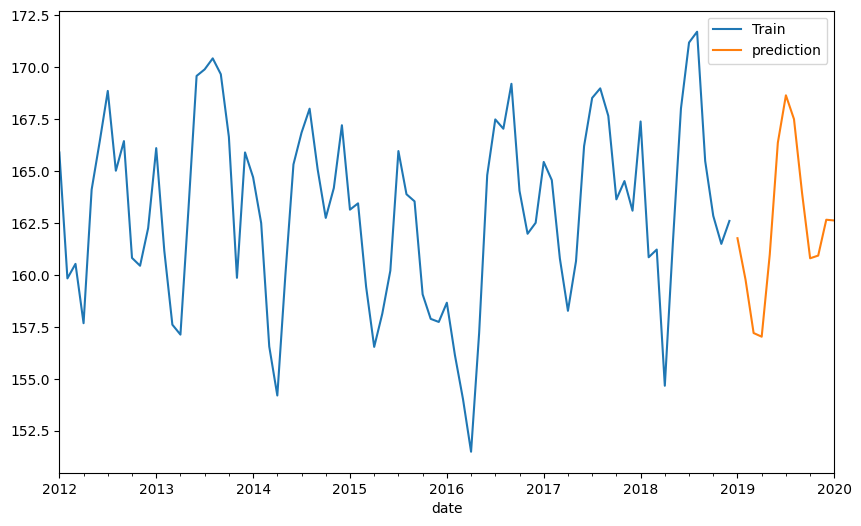

In [204]:
ts.plot(legend=True, label='Train', figsize=(10,6))
prediction.plot(legend=True, label='prediction')